## Set up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load Dataset

In [2]:
df =pd.read_csv(r"/Users/dejicuomu/Desktop/CV Projects/001 Bitcoin/bitcoin_price_Training - Training.csv")

##  Exploring Data

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
# Convert the 'Date' column to the datetime64 data type
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [6]:
# Display the data types of each column 
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [7]:
# Convert the 'Date' column to the datetime64 data type
df['Date'] = df['Date'].astype('datetime64[ns]')

In [8]:
# Find the minimum date
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [9]:
# Find the minimum date
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [10]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [11]:
# Check the data type
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Check for missing values

In [12]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [13]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [14]:
# Display the last 5 rows of the DataFrame
df.tail(5)

,Date,Open,High,Low,Close,Volume,Market Cap
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"


In [15]:
# Sort the DataFrame by index in ascending order
df.sort_index()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [16]:
# Sort the DataFrame based on index in descending order
df.sort_index(ascending = False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [17]:
#reset the index
df.sort_index(ascending = False).reset_index()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [18]:
# Sort the DataFrame by index in descending order and reset the index to default integer index
data = df.sort_index(ascending = False).reset_index()

## Visualizing Data

In [19]:
# Drop the column named 'index' from the data DataFrame, modifying it in-place

data.drop('index', axis = 1, inplace = True)

In [20]:
# Get the column labels of the data DataFrame
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

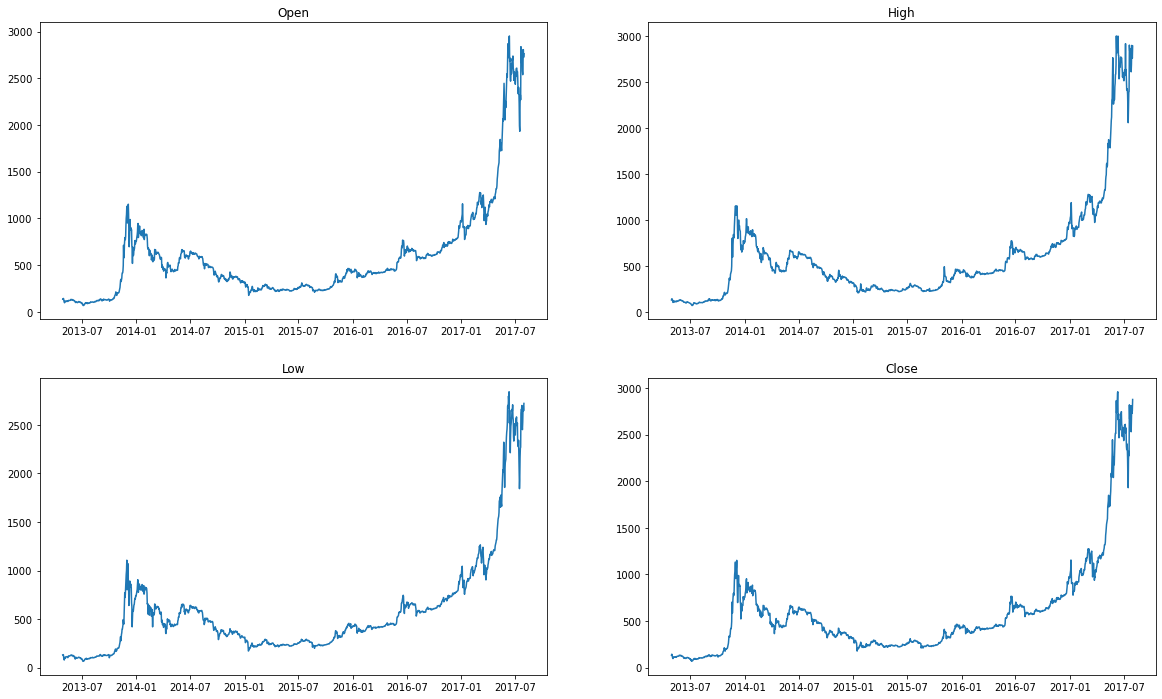

In [21]:
# Set the size of the overall figure
plt.figure(figsize=(20,12))
# Iterate through the column labels list

for index, col in enumerate (['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

In [22]:
data.shape

(1556, 7)

In [23]:
# Create a subset of the DataFrame 'data' containing the first 50 rows
bitcoin_sample = data[0:50]

## Set up Environment

In [24]:
!pip install chart_studio
!pip install plotly

In [25]:
import chart_studio as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


## Visualizing Data

In [26]:
init_notebook_mode(connected = True)

In [27]:
# Create a Candlestick trace
trace = go.Candlestick(x = bitcoin_sample['Date'],
              high = bitcoin_sample['High'],
              open = bitcoin_sample['Open'],
              close = bitcoin_sample['Close'],
               low = bitcoin_sample['Low'])

In [28]:
# Display the candlestick chart
candle_data = [trace]

In [29]:
fig = go.Figure(data = candle_data)
# Update the layout to hide the x-axis range slider
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

## Data Exploration

In [30]:
# access the 'Close' column in the DataFrame
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [31]:
# Set the 'Date' column as the index of the DataFrame 'data'
data.set_index('Date', inplace = True)

<AxesSubplot:xlabel='Date'>

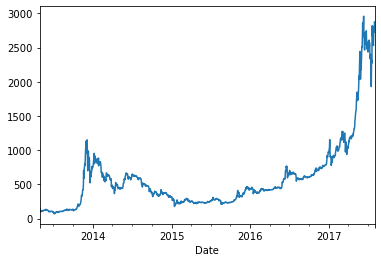

In [32]:
# Plot the 'Close' column
data['Close'].plot()

## Data Visualization


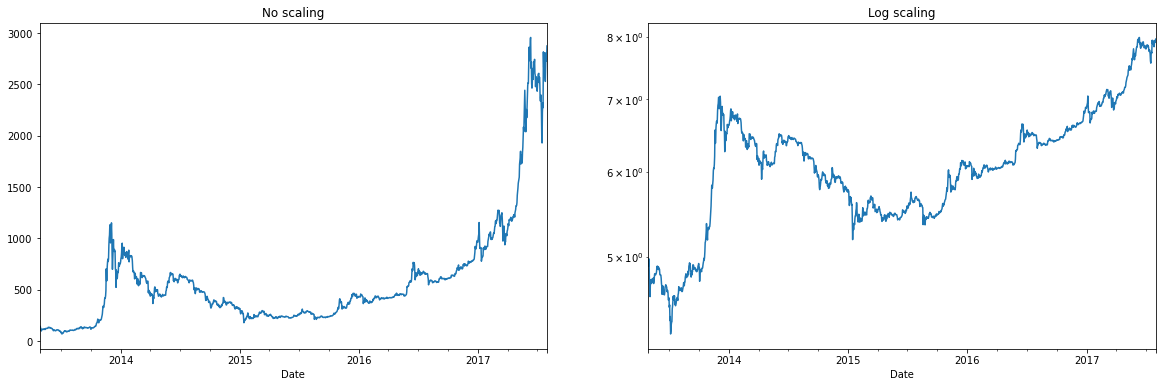

In [33]:
# Set the figure size
plt.figure(figsize=(20,6))

# Plot the original 'Close' values
plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')

# Plot the log-transformed 'Close' values
plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log scaling')

# Show the plot
plt.yscale('log')

## Data Exploration



In [34]:
# Display the first 4 rows
data.head(4)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


## Data Visualization


In [35]:
data['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [36]:
# Resample the 'Close' column annually and calculate the mean
data['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

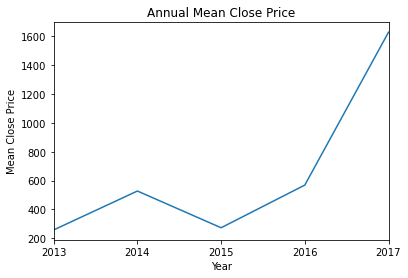

In [37]:
# Resample the 'Close' column annually and calculate the mean, then plot
data['Close'].resample('Y').mean().plot()

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Close Price')
plt.title('Annual Mean Close Price')

# Show the plot
plt.show()

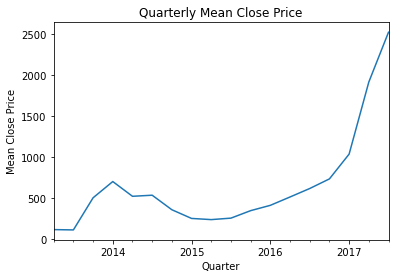

In [38]:
data['Close'].resample('Q').mean().plot()
# Add labels and title
plt.xlabel('Quarter')
plt.ylabel('Mean Close Price')
plt.title('Quarterly Mean Close Price')

# Show the plot
plt.show()

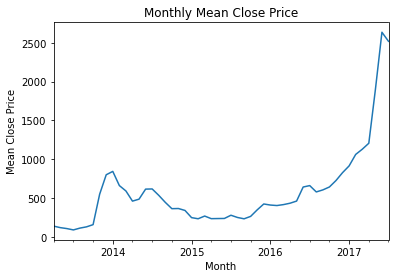

In [39]:
# Resample the 'Close' column monthly and calculate the mean, then plot
data['Close'].resample('M').mean().plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Mean Close Price')
plt.title('Monthly Mean Close Price')

# Show the plot
plt.show()
